In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Set graphing format to SVG
set_matplotlib_formats("svg")

In [10]:
oil_prices = pd.read_csv(
    "Weekly_U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv",
    header=1, parse_dates=[0], names=["Date", "Gas Price"], index_col=0
)
pfe_prices = pd.read_csv("PFE.csv", parse_dates=[0], index_col=0)
covid_data = pd.read_csv("WHO-COVID-19-global-data.csv", parse_dates=[0], index_col=0)

# Filter US COVID data
covid_data = covid_data.loc[covid_data["Country_code"] == "US"]

# Sort by date
oil_prices.sort_values(by="Date", ascending=True, inplace=True)
covid_data.sort_values(by="Date_reported", ascending=True, inplace=True)

# Linearly fill the oil prices to daily
new_idx = pd.date_range(min(oil_prices.index), max(oil_prices.index))
oil_prices = oil_prices.reindex(new_idx).interpolate()

In [11]:
# Merge datasets
merged_data = pd.merge(pfe_prices, covid_data, how="inner", left_index=True, right_index=True)
merged_data = pd.merge(merged_data, oil_prices, how="inner", left_index=True, right_index=True)

<AxesSubplot:title={'center':'Pfizer Stock vs. COVID Cases in US'}, xlabel='Cumulative_cases', ylabel='Open'>

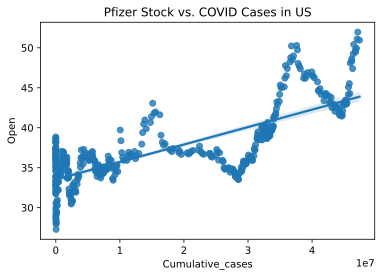

In [12]:
plt.title("Pfizer Stock vs. COVID Cases in US")
plt.xlabel("Culmulative Number of Cases")
plt.ylabel("PFE Open Price/$")
sns.regplot(x=merged_data["Cumulative_cases"], y=merged_data["Open"])

<AxesSubplot:title={'center':'Retail Gasoline Price vs. COVID Cases in US'}, xlabel='Cumulative_cases', ylabel='Gas Price'>

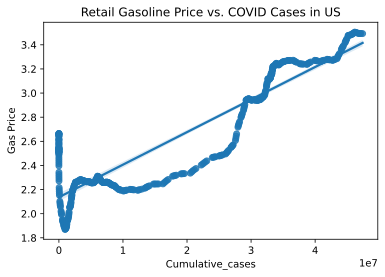

In [5]:
plt.title("Retail Gasoline Price vs. COVID Cases in US")
plt.xlabel("Culmulative Number of Cases")
plt.ylabel("US Retail Gas Price/$")
sns.regplot(x=merged_data["Cumulative_cases"], y=merged_data["Gas Price"])